# Motivation
该实验的原因是因为发现一个问题：<br/>
当bodynet的输出为32x32时的结果总是比16x16的要差，（32x32比16x16时候框的总数要更多，正例的数量增加几乎可以忽略不记，但是反例的数量却极大程度的增长了。）</br>
比如vgg11bn[:21]作为body网络时（bodynet输出32x32），实验日志如下
```
epoch: 9 time: 2.97 loss: 0.1440, 0.1935 lr: 0.5000 train mae: 0.0147 AP: 0.4985 valid mae: 0.0125 AP: 0.4982
epoch: 19 time: 2.96 loss: 0.0942, 0.1201 lr: 0.5000 train mae: 0.0100 AP: 0.6326 valid mae: 0.0087 AP: 0.7018
epoch: 29 time: 2.90 loss: 0.0845, 0.0990 lr: 0.5000 train mae: 0.0086 AP: 0.6214 valid mae: 0.0074 AP: 0.7475
epoch: 39 time: 2.88 loss: 0.0767, 0.0870 lr: 0.5000 train mae: 0.0083 AP: 0.7231 valid mae: 0.0069 AP: 0.8206
epoch: 49 time: 2.95 loss: 0.0566, 0.0667 lr: 0.5000 train mae: 0.0064 AP: 0.6588 valid mae: 0.0062 AP: 0.8246
epoch: 59 time: 2.92 loss: 0.0621, 0.0721 lr: 0.5000 train mae: 0.0072 AP: 0.7082 valid mae: 0.0058 AP: 0.8204
epoch: 69 time: 2.87 loss: 0.0591, 0.0625 lr: 0.5000 train mae: 0.0066 AP: 0.7504 valid mae: 0.0057 AP: 0.8107
epoch: 79 time: 2.97 loss: 0.0475, 0.0553 lr: 0.5000 train mae: 0.0055 AP: 0.7216 valid mae: 0.0055 AP: 0.8361
epoch: 89 time: 2.93 loss: 0.0513, 0.0604 lr: 0.5000 train mae: 0.0062 AP: 0.6992 valid mae: 0.0052 AP: 0.8526
epoch: 99 time: 2.90 loss: 0.0474, 0.0469 lr: 0.5000 train mae: 0.0054 AP: 0.7582 valid mae: 0.0047 AP: 0.8362
epoch: 109 time: 3.39 loss: 0.0458, 0.0456 lr: 0.2500 train mae: 0.0052 AP: 0.7627 valid mae: 0.0046 AP: 0.8395
epoch: 119 time: 2.87 loss: 0.0498, 0.0549 lr: 0.2500 train mae: 0.0060 AP: 0.7357 valid mae: 0.0048 AP: 0.8369
epoch: 129 time: 2.84 loss: 0.0451, 0.0453 lr: 0.2500 train mae: 0.0054 AP: 0.7606 valid mae: 0.0044 AP: 0.8438
epoch: 139 time: 2.99 loss: 0.0436, 0.0433 lr: 0.2500 train mae: 0.0051 AP: 0.7470 valid mae: 0.0046 AP: 0.8526
epoch: 149 time: 2.95 loss: 0.0435, 0.0431 lr: 0.2500 train mae: 0.0052 AP: 0.7822 valid mae: 0.0043 AP: 0.8454
epoch: 159 time: 2.89 loss: 0.0437, 0.0417 lr: 0.1250 train mae: 0.0051 AP: 0.7557 valid mae: 0.0042 AP: 0.8384
epoch: 169 time: 2.83 loss: 0.0381, 0.0371 lr: 0.1250 train mae: 0.0044 AP: 0.7630 valid mae: 0.0043 AP: 0.8362
epoch: 179 time: 2.85 loss: 0.0409, 0.0398 lr: 0.1250 train mae: 0.0048 AP: 0.7857 valid mae: 0.0043 AP: 0.8411
epoch: 189 time: 2.93 loss: 0.0392, 0.0390 lr: 0.0625 train mae: 0.0047 AP: 0.7584 valid mae: 0.0041 AP: 0.8366
epoch: 199 time: 2.85 loss: 0.0400, 0.0426 lr: 0.0625 train mae: 0.0049 AP: 0.7420 valid mae: 0.0040 AP: 0.8394
```
而vgg11bn[:22]（加了一层Pooling层）作为body网络时（bodynet输出16x16），实验日志如下
```
epoch: 9 time: 2.60 loss: 0.1158, 0.1527 lr: 0.5000 train mae: 0.0115 AP: 0.5816 valid mae: 0.0102 AP: 0.7162
epoch: 19 time: 2.59 loss: 0.0972, 0.1216 lr: 0.5000 train mae: 0.0101 AP: 0.6928 valid mae: 0.0069 AP: 0.8009
epoch: 29 time: 2.56 loss: 0.0805, 0.0953 lr: 0.5000 train mae: 0.0088 AP: 0.7432 valid mae: 0.0061 AP: 0.8374
epoch: 39 time: 2.80 loss: 0.0707, 0.0701 lr: 0.5000 train mae: 0.0072 AP: 0.7947 valid mae: 0.0056 AP: 0.8604
epoch: 49 time: 2.55 loss: 0.0664, 0.0717 lr: 0.5000 train mae: 0.0072 AP: 0.7740 valid mae: 0.0052 AP: 0.8631
epoch: 59 time: 2.54 loss: 0.0589, 0.0635 lr: 0.5000 train mae: 0.0067 AP: 0.7875 valid mae: 0.0053 AP: 0.8809
epoch: 69 time: 2.54 loss: 0.0600, 0.0658 lr: 0.5000 train mae: 0.0070 AP: 0.8076 valid mae: 0.0046 AP: 0.8950
epoch: 79 time: 2.55 loss: 0.0565, 0.0569 lr: 0.5000 train mae: 0.0063 AP: 0.8007 valid mae: 0.0044 AP: 0.9046
epoch: 89 time: 2.58 loss: 0.0534, 0.0490 lr: 0.5000 train mae: 0.0059 AP: 0.8142 valid mae: 0.0043 AP: 0.9034
epoch: 99 time: 2.76 loss: 0.0488, 0.0550 lr: 0.5000 train mae: 0.0058 AP: 0.8066 valid mae: 0.0043 AP: 0.9008
epoch: 109 time: 2.52 loss: 0.0415, 0.0350 lr: 0.2500 train mae: 0.0045 AP: 0.8382 valid mae: 0.0041 AP: 0.8972
epoch: 119 time: 2.59 loss: 0.0441, 0.0364 lr: 0.2500 train mae: 0.0048 AP: 0.8151 valid mae: 0.0040 AP: 0.9062
epoch: 129 time: 2.53 loss: 0.0518, 0.0438 lr: 0.2500 train mae: 0.0055 AP: 0.8269 valid mae: 0.0038 AP: 0.9021
epoch: 139 time: 2.62 loss: 0.0514, 0.0526 lr: 0.2500 train mae: 0.0058 AP: 0.8118 valid mae: 0.0037 AP: 0.9017
epoch: 149 time: 2.59 loss: 0.0477, 0.0422 lr: 0.2500 train mae: 0.0051 AP: 0.8070 valid mae: 0.0038 AP: 0.9031
epoch: 159 time: 2.55 loss: 0.0440, 0.0371 lr: 0.1250 train mae: 0.0047 AP: 0.8394 valid mae: 0.0036 AP: 0.9076
epoch: 169 time: 2.54 loss: 0.0492, 0.0467 lr: 0.1250 train mae: 0.0057 AP: 0.8249 valid mae: 0.0036 AP: 0.9034
epoch: 179 time: 2.57 loss: 0.0422, 0.0344 lr: 0.1250 train mae: 0.0047 AP: 0.8138 valid mae: 0.0037 AP: 0.9031
epoch: 189 time: 2.68 loss: 0.0507, 0.0439 lr: 0.0625 train mae: 0.0055 AP: 0.8354 valid mae: 0.0037 AP: 0.9076
epoch: 199 time: 2.55 loss: 0.0483, 0.0410 lr: 0.0625 train mae: 0.0052 AP: 0.8139 valid mae: 0.0035 AP: 0.9048
```

# 实验总结

### 1. 首先， 我们对比一下使用vgg11bn[:21] (out 32x32)、vgg11bn[:22] (out 16x16)、vgg11bn[:25] (out 16x16)作为bodynet时候的网络训练结果
![](../_image/train11_ap.png)<br/>
![](../_image/train11_ap2.png)<br/>
可以看到，out为32x32的vgg11bn[:21]的精度明显低于另两者；而22和25则差不多，25在train set上效果略好一点，因为bodynet更深一点。

### 2. 查看三者的ROC曲线
![](../_image/train11_roc.png)<br/>
发现vgg11bn[:21]在recall很高的时候，prec的下降幅度远远高于另两者。这说明，高recall段，分数很低，当分数降低时，低分正例被检测出，但是更多比例的反例也被错检测为正例，这说明正例子中有很多低分或者反例中有很多高分（后面证明是前者）。

### 3. 查看tp和fp的结果中样例个数随分数之间关系的分布
![](../_image/train11_tp_fp_score_distribute.png)<br/>
发现vgg11bn[:21]的tp检测结果分布有个特点，高分很多，低分也很多，但是中间却很少。我们可以认为是大量的负例子拉低了正类的得分。<br/>

### 4. 查看具体的例子里面哪些目标的得分很低
下图是vgg11bn[:21]的结果，发现小目标基本都没有被检测出来
![](../_image/train11_image.png)<br/>
下图是vgg11bn[:22]的结果，发现小目标被很好的检测出来
![](../_image/train11_image2.png)<br/>

### 5. 根据数据中框的大小统计（data_prepare/data_analysis）,修改SSD的sizes_list，重新训练vgg11bn[:21]
```
sizes_list = [[.2,.272], [.37,.447], [.54,.619],
                       [.71,.79], [.88,.961]]
                       ==>
sizes_list = [[ 0.10416667 ,0.17361111], [0.18624024, 0.34354575], [.37,.619],
                      [.71,.79], [.88,.961]]
```
发现小目标的问题被很好解决了
![](../_image/train11_image3.png)<br/>
尺度问题解决：数据增强 + 模型多尺度的anchors,但是与感受野的大小其实关联不大（感觉SSD框的修正可能和bounding box regression一样，只是在做数据集上一个简单的回归。）<br/>
而tp个数随着分数的分布也变得和vgg11bn[:22]和vgg11bn[:25]类似了，低分区数量不再很多了<br/>
![](../_image/train11_tp_fp_score_distribute2.png)<br/>

### 总结：
解决模型中小尺度目标不能被检测出来的方案，有两个：<br/>
1. 减小bodynet的输出大小，由32x32 ==> 16x16 ？？？为什么这会有效果。<br/>
2. 数据多尺度增强，模型的anchor box的尺度调小点（根据数据分布调节,过于小可能也没有收益）<br/>

# 实验内容

## 0. before work

```
you must run ../data_prepare/data_prepare.ipynb to create rec dataset firstly
and then run this train file
```

## 1. import package and set global var

In [1]:
import mxnet as mx
from mxnet import gluon, image, autograd, nd
from mxnet.gluon import nn
from mxnet.contrib.ndarray import MultiBoxPrior, MultiBoxTarget, MultiBoxDetection
from mxnet import metric
from mxnet.gluon import model_zoo

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import time

import sys
sys.path.append("../")
from utils.utils import show_9_images, show_images, mkdir_if_not_exist, evaluate_MAP, draw_ROC,cal_scores_recall_prec

# dataset root dir
coins_root = "../dataset/"
sdl_root = coins_root + "sdl-coins/"
swiss_root = coins_root + "swiss-coins/"

data_shape = (3, 256, 256)
batch_size = 4
#mean = np.array([ 167.02477919,  157.20263027,  140.25492473])
#std = np.array([ 46.06696734,  47.12624331,  50.81295717])
rgb_mean = np.array([123, 117, 104])
std = np.array([58.395, 57.12, 57.375])

ctx = mx.gpu(0)
resize = (data_shape[1], data_shape[2])

## 2. load data and plot data
```
ImageDetIter will call CreateDetAugmenter
if mean==True, it will sub defualt mean
if std==True, it will div default std

both mean and std can not set to False.

or you can cal them and set them as np.array([r, g, b])

在数据中加入rand_crop，添加多尺度信息
```

In [2]:
def get_iterators(rec_prefix, data_shape, batch_size):
    class_names = ['1yuan', '0.5yuan']
    num_class = len(class_names)
    train_iter = image.ImageDetIter(
        batch_size=batch_size, 
        data_shape=data_shape,
        path_imgrec=rec_prefix + '_train.rec',
        path_imgidx=rec_prefix + '_train.idx',
        shuffle=True,
        mean=True,
        std=True,
        rand_crop=1,
        rand_gray=0.2,
        rand_mirror=True,
        rand_pad=0.4,
        pad_val=(rgb_mean[0], rgb_mean[1], rgb_mean[2]),
        min_object_covered=0.95,
        max_attempts=200,
        brightness=0.2,
        contrast=0.2,
        saturation=0.2,
        hue=0.05,
        aspect_ratio_range=(0.5, 2),
        pca_noise=0.01,
    )
    
    valid_iter = image.ImageDetIter(
        batch_size=batch_size, 
        data_shape=data_shape,
        path_imgrec=rec_prefix+'_val.rec',
        shuffle=False,
        mean=True,
        std=True
    )
    
    return train_iter, valid_iter, class_names, num_class

rec_prefix = sdl_root+"rec/sdl_" + str(resize[0]) + "_" + str(resize[1])
train_data, valid_data, class_names, num_class = get_iterators(rec_prefix, data_shape, batch_size)
    

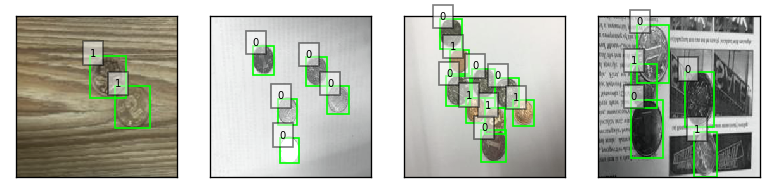

(4L, 14L, 5L)


In [3]:
"""
data plot
"""
mpl.rcParams['figure.dpi'] = 120

train_data.reset()
batch = train_data.next()
images = batch.data[0][:]
labels = batch.label[0][:]

show_images(images.asnumpy(), labels.asnumpy(), rgb_mean, std, show_text=True, fontsize=6, MN=(2, 4))
#show_9_images(images.asnumpy(), labels, rgb_mean)
print labels.shape

## 3. model define

In [4]:
"""
model define
"""
from mxnet.gluon.model_zoo.vision import *

def get_BodyNet(BaseModel, num_layers, ctx, pretrained=True):
    bose_model = BaseModel(pretrained=pretrained, ctx=ctx)
    net = gluon.nn.HybridSequential()
    net.add(*(bose_model.features[:num_layers]))
    return net

def get_BodyNet_and_downsmaplers(BaseModel, layers_list, ctx, pretrained=True):
    bose_model = BaseModel(pretrained=pretrained, ctx=ctx)
    body = gluon.nn.HybridSequential()
    body.add(*(bose_model.features[:layers_list[0]]))
    downsamplers = gluon.nn.HybridSequential()
    for i in range(len(layers_list)-1):
        downsampler = gluon.nn.HybridSequential()
        downsampler.add(*(bose_model.features[layers_list[i]:layers_list[i+1]]))
        downsamplers.add(downsampler)
    return body, downsamplers
    

BaseModels = {'vgg11bn': (model_zoo.vision.vgg11_bn, 21), 
              'alexnet': (model_zoo.vision.alexnet, -1),
              'mobilenet_1_0': (model_zoo.vision.mobilenet1_0, 33)}

def down_sample(num_filter):
    out = nn.HybridSequential()
    for _ in range(2):
        out.add(nn.Conv2D(num_filter, kernel_size=3, strides=1, padding=1))
        out.add(nn.BatchNorm(in_channels=num_filter))
        out.add(nn.Activation('relu'))
    out.add(nn.MaxPool2D(2))
    return out

def class_predictor(num_class, num_anchors):
    return nn.Conv2D(num_anchors * (num_class + 1), kernel_size=3, strides=1, padding=1)

def box_predictor(num_anchors):
    return nn.Conv2D(num_anchors * 4, kernel_size=3, strides=1, padding=1)

class SSD(nn.HybridBlock):
    def __init__(self, num_class, sizes_list, ratios_list, ctx, 
                 verbose=False, body_net_args=[vgg11_bn, [21], True],**kwargs):
        """
        body_net_args: [BaseModel, num_layers, pretrain]
        """
        super(SSD, self).__init__(**kwargs)
        self.num_class = num_class
        self.sizes_list = sizes_list
        self.ratios_list = ratios_list
        self.num_anchors = num_anchors = (len(sizes_list[0]) + len(ratios_list[0]) - 1)
        self.verbose = verbose
        
        BaseModel, layers_list, pretrained = body_net_args
        
        with self.name_scope():
            # part 1
            self.body, self.downsamples = get_BodyNet_and_downsmaplers(BaseModel, layers_list, ctx, pretrained)
            self.pretrain_part = self.body.collect_params()
            self.pretrain_part.update(self.downsamples.collect_params())

            # part 2
            self.downsamples2 = nn.HybridSequential()
            for _ in range(len(sizes_list) - 2 - len(self.downsamples)):
                self.downsamples2.add(down_sample(128))
            self.downsamples.add(*(self.downsamples2[:]))

            # part 3
            self.class_predictors = nn.HybridSequential()
            self.box_predictors = nn.HybridSequential()
            for _ in range(len(sizes_list)):
                self.class_predictors.add(class_predictor(num_class, num_anchors))
                self.box_predictors.add(box_predictor(num_anchors))
                
            self.downsamples2.initialize(ctx=ctx)
            self.class_predictors.initialize(ctx=ctx)
            self.box_predictors.initialize(ctx=ctx)
            
            self.no_pretrain_part = self.downsamples2.collect_params()
            self.no_pretrain_part.update(self.class_predictors.collect_params())
            self.no_pretrain_part.update(self.box_predictors.collect_params())
            
    def hybrid_forward(self, F, x):
        x = self.body(x)
        cls_preds = []
        box_preds = []
        anchors = []
        for i in range(len(self.sizes_list)):
            cls_preds.append((self.class_predictors[i](x)).transpose((0, 2, 3, 1)).flatten())
            box_preds.append((self.box_predictors[i](x)).transpose((0, 2, 3, 1)).flatten())
            anchors.append(MultiBoxPrior(x, sizes=self.sizes_list[i], ratios=self.ratios_list[i]))

            if self.verbose:
                print "predict scale", i, x.shape, 'with', anchors[-1].shape, 'anchors'

            if i < len(self.sizes_list) - 2:
                x = self.downsamples[i](x)
            elif i == len(self.sizes_list) - 2:
                x = F.Pooling(x, global_pool=True, pool_type='max', kernel=(x.shape[2], x.shape[3]))
        cls_preds = nd.concat(*cls_preds, dim=1).reshape((0, -1, num_class+1))
        box_preds = nd.concat(*box_preds, dim=1)
        anchors = nd.concat(*anchors, dim=1)
        return anchors, box_preds, cls_preds

# sizes_list = [[.2,.272], [.37,.447], [.54,.619],
#                       [.71,.79], [.88,.961]]
sizes_list = [[ 0.10416667 ,0.17361111], [0.18624024, 0.34354575], [.37,.619],
                      [.71,.79], [.88,.961]]
ratios_list = [[1, 2, .5]]*len(sizes_list)

In [5]:
import time
net = SSD(2, sizes_list, ratios_list, ctx, 
          verbose=True, body_net_args=[vgg11_bn, [15, 22, 29], True], prefix="ssd_")
print net
# #net.initialize()
tic = time.time()
anchors, box_preds, cls_preds = net(batch.data[0].as_in_context(ctx))
print time.time() - tic
box_offset, box_mask, cls_labels = MultiBoxTarget(anchors, batch.label[0].as_in_context(ctx), cls_preds.transpose(axes=(0, 2, 1)))
print cls_labels.shape, cls_preds.shape, box_offset.shape, box_mask.shape

SSD(
  (downsamples): HybridSequential(
    (0): HybridSequential(
      (0): Conv2D(512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm(fix_gamma=False, eps=1e-05, momentum=0.9, axis=1)
      (2): Activation(relu)
      (3): Conv2D(512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm(fix_gamma=False, eps=1e-05, momentum=0.9, axis=1)
      (5): Activation(relu)
      (6): MaxPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False)
    )
    (1): HybridSequential(
      (0): Conv2D(512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm(fix_gamma=False, eps=1e-05, momentum=0.9, axis=1)
      (2): Activation(relu)
      (3): Conv2D(512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm(fix_gamma=False, eps=1e-05, momentum=0.9, axis=1)
      (5): Activation(relu)
      (6): MaxPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False)
    )
    (2): HybridSequential(
      (0): 

# 4. loss define

In [6]:
"""
loss define
"""
class FocalLoss(gluon.loss.Loss):
    def __init__(self, axis=-1, alpha=0.25, gama=2, batch_axis=0, **kwargs):
        super(FocalLoss, self).__init__(None, batch_axis, **kwargs)
        self.alpha = alpha
        self.gama = gama
        self.axis = axis
        self.batch_axis = batch_axis
        
    def hybrid_forward(self, F, y, label):
        y = F.softmax(y)
        py = y.pick(label, axis=self.axis, keepdims=True)
        loss = - (self.alpha * ((1 - py) ** self.gama)) * py.log()
        return loss.mean(axis=self.batch_axis, exclude=True)
    
class SmoothL1Loss(gluon.loss.Loss):
    def __init__(self, batch_axis=0, **kwargs):
        super(SmoothL1Loss, self).__init__(None, batch_axis, **kwargs)
        self.batch_axis = batch_axis
        
    def hybrid_forward(self, F, y, label, mask):
        loss = F.smooth_l1((y - label) * mask, scalar=1.0)
        return loss.mean(axis=self.batch_axis, exclude=True)
    
cls_loss = FocalLoss()
#cls_loss = gluon.loss.SoftmaxCrossEntropyLoss()
#cls_loss = gluon.loss.SoftmaxCrossEntropyLoss()
box_loss = SmoothL1Loss()

# 5. train and plot result

In [7]:
"""
train net
"""

def evaluate_acc(data_iter, ctx):
    data_iter.reset()
    box_metric = metric.MAE()
    outs, labels = None, None
    for i, batch in enumerate(data_iter):
        data = batch.data[0].as_in_context(ctx)
        label = batch.label[0].as_in_context(ctx)
        anchors, box_preds, cls_preds = net(data)
        box_offset, box_mask, cls_labels = MultiBoxTarget(anchors, label, cls_preds.transpose(axes=(0, 2, 1)),
                                                                  negative_mining_ratio=3.0)#, overlap_threshold=0.75)
        box_metric.update([box_offset], [box_preds * box_mask])
        
        cls_probs = nd.SoftmaxActivation(cls_preds.transpose((0, 2, 1)), mode='channel')
        out = MultiBoxDetection(cls_probs, box_preds, anchors, force_suppress=True, clip=False, nms_threshold=0.45)
        if outs is None:
            outs = out
            labels = label
        else:
            outs = nd.concat(outs, out, dim=0)
            labels = nd.concat(labels, label, dim=0)
    AP = evaluate_MAP(outs, labels)
    return AP, box_metric
        
info = {"train_ap": [], "valid_ap": [], "loss": []}
def train(net, start_epoch, end_epoch, trainers=None):
    if trainers is None:
        trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.5, 'wd': 5e-4})
        trainers = [trainer]
    box_metric = metric.MAE()
    
    for e in range(start_epoch, end_epoch):
        train_data.reset()
        box_metric.reset()
        tic = time.time()
        _loss = [0,0]
        if e == 100 or e == 150 or e==180:
#         if e == 150 or e==180:
            trainer.set_learning_rate(trainer.learning_rate * 0.5)
            
        outs, labels = None, None
        for i, batch in enumerate(train_data):
            data = batch.data[0].as_in_context(ctx)
            label = batch.label[0].as_in_context(ctx)
            with autograd.record():
                anchors, box_preds, cls_preds = net(data)
                box_offset, box_mask, cls_labels = MultiBoxTarget(anchors, label, cls_preds.transpose(axes=(0, 2, 1)),
                                                                  negative_mining_ratio=3.0)#, overlap_threshold=0.75)
                loss1 = cls_loss(cls_preds, cls_labels)
                loss2 = box_loss(box_preds, box_offset, box_mask)
                loss = loss1 + loss2
            loss.backward()
            for trainer in trainers:
                trainer.step(data.shape[0])
            _loss[0] += nd.mean(loss1).asscalar()
            _loss[1] += nd.mean(loss2).asscalar()
            
            cls_probs = nd.SoftmaxActivation(cls_preds.transpose((0, 2, 1)), mode='channel')
            out = MultiBoxDetection(cls_probs, box_preds, anchors, force_suppress=True, clip=False, nms_threshold=0.45)
            if outs is None:
                outs = out
                labels = label
            else:
                outs = nd.concat(outs, out, dim=0)
                labels = nd.concat(labels, label, dim=0)
            
            box_metric.update([box_offset], [box_preds * box_mask])
        
        train_AP = evaluate_MAP(outs, labels)
        valid_AP, val_box_metric = evaluate_acc(valid_data, ctx)
        info["train_ap"].append(train_AP)
        info["valid_ap"].append(valid_AP)
        info["loss"].append(_loss)
        
        if (e+1) % 10 == 0:
            print "epoch: %d time: %.2f loss: %.4f, %.4f lr: %.4f" % (e, time.time() - tic,_loss[0], _loss[1], trainer.learning_rate),
            print "train mae: %.4f AP: %.4f" % (box_metric.get()[1], train_AP),
            print "valid mae: %.4f AP: %.4f" % (val_box_metric.get()[1], valid_AP)

In [8]:
def plot_acc(info, x_range=(0, -1)):
    def plot(key, range_x):
        i, j = range_x
        plt.plot(range(len(info[key][i:j])), info[key][i:j], label=key)

    info["loss"] = np.array(info["loss"])
    info["loss1"] = info["loss"][:, 0]
    info["loss2"] = info["loss"][:, 1]

    plt.figure(figsize=(12, 4))   # (w, h)
    plt.subplot(121)
    plot("train_ap", x_range)
    plot("valid_ap", x_range)
    plt.legend(loc="upper right")
    plt.subplot(122)
    plot("loss1", x_range)
    plot("loss2", x_range)
    plt.legend(loc="upper right")
    
def plot_multi_acc(info, x_range=(0, -1), tags=None, epoch_num=200, color='rgb'):
    def plot(key, range_x, suffix="", args='-'):
        i, j = range_x
        plt.plot(range(x_range[0], x_range[0]+len(info[key][i:j])), info[key][i:j], args, label=key+suffix)
        
    info["loss"] = np.array(info["loss"])
    info["loss1"] = info["loss"][:, 0]
    info["loss2"] = info["loss"][:, 1]
    x_range = list(x_range)
    if x_range[1] == -1: x_range[1] = epoch_num

    if tags is None:
        tags = range(len(info["loss1"]) / epoch_num)
    
    plt.figure(figsize=(12, 4))   # (w, h)
    plt.subplot(121)
    _x_range = (x_range[0], x_range[1])
    for i in range(len(info["train_ap"]) / epoch_num):
        plot("train_ap", _x_range, "_" + str(tags[i]), color[i]+"-")
        plot("valid_ap", _x_range, "_" + str(tags[i]), color[i]+"--")
        _x_range = (_x_range[0] + epoch_num, _x_range[1] + epoch_num)
    plt.legend(loc="lower right")
    plt.subplot(122)
    _x_range = (x_range[0], x_range[1])
    for i in range(len(info["loss1"]) / epoch_num):
        plot("loss1", _x_range, "_" + str(tags[i]), color[i]+"-")
        plot("loss2", _x_range, "_" + str(tags[i]), color[i]+"--")
        _x_range = (_x_range[0] + epoch_num, _x_range[1] + epoch_num)
    plt.legend(loc="upper right")
    
    
def plot_ROC(train_data, net, show=True, color='r', label_suffix=""):
    train_data.reset()
    outs = None
    labels = None
    for i, batch in enumerate(train_data):
        data = batch.data[0].as_in_context(ctx)
        label = batch.label[0].as_in_context(ctx)
        anchors, box_preds, cls_preds = net(data)
        cls_probs = nd.SoftmaxActivation(cls_preds.transpose((0, 2, 1)), mode="channel")
        out = MultiBoxDetection(cls_probs, box_preds, anchors, force_suppress=True, clip=False, nms_threshold=0.45)
        if outs is None:
            outs = out
            labels = label
        else:
            outs = nd.concat(*[outs, out], dim=0)
            labels = nd.concat(*[labels, label], dim=0)

    print outs.shape
    print labels.shape
    print evaluate_MAP(outs, labels)
    draw_ROC(outs, labels, verbose=True, show=show, color=color, label_suffix=label_suffix)
    

    
from utils.utils import cal_pred_scores_pair
def plot_Score_hist(train_data, net, show=True, color='r', label_suffix=""):
    train_data.reset()
    outs = None
    labels = None
    for i, batch in enumerate(train_data):
        data = batch.data[0].as_in_context(ctx)
        label = batch.label[0].as_in_context(ctx)
        anchors, box_preds, cls_preds = net(data)
        cls_probs = nd.SoftmaxActivation(cls_preds.transpose((0, 2, 1)), mode="channel")
        out = MultiBoxDetection(cls_probs, box_preds, anchors, force_suppress=True, clip=False, nms_threshold=0.45)
        if outs is None:
            outs = out
            labels = label
        else:
            outs = nd.concat(*[outs, out], dim=0)
            labels = nd.concat(*[labels, label], dim=0)
    scores, is_tp, num_pred, num_gt = cal_pred_scores_pair(outs.asnumpy(), labels.asnumpy(), overlap_threshold=0.01)
    tp_score = []
    fp_score = []
    for i in range(len(scores)):
        if is_tp[i]:
            tp_score.append(scores[i])
        else:
            fp_score.append(scores[i])
    plt.subplot(121)
    plt.hist(tp_score, label="tp_score_distribute"+label_suffix)
    plt.legend(loc="upper left")
    plt.subplot(122)
    plt.hist(fp_score, label="fp_score_distribute"+label_suffix)
    plt.legend(loc="upper right")

## 5.1. vgg11bn EXP: different number of bodynet
sizes_list = [[.2,.272], [.37,.447], [.54,.619], [.71,.79], [.88,.961]]
```
body_net_args=[vgg11_bn, [15, 22, 29], True] means:
body_net = vgg11_bn[:15]
downsamples[0] = vgg11_bn[15:22]
downsamples[1] = vgg11_bn[22:29]
```

In [17]:
del net, info
info = {"train_ap": [], "valid_ap": [], "loss": []}
net = SSD(2, sizes_list, ratios_list, ctx, 
          verbose=False, body_net_args=[vgg11_bn, [22], True], prefix="ssd_")
train(net, 0, 200)

epoch: 9 time: 2.63 loss: 0.1213, 0.1646 lr: 0.5000 train mae: 0.0125 AP: 0.5844 valid mae: 0.0106 AP: 0.7494
epoch: 19 time: 2.60 loss: 0.1026, 0.1214 lr: 0.5000 train mae: 0.0102 AP: 0.6846 valid mae: 0.0073 AP: 0.7622
epoch: 29 time: 2.56 loss: 0.0787, 0.0931 lr: 0.5000 train mae: 0.0083 AP: 0.7293 valid mae: 0.0063 AP: 0.8711
epoch: 39 time: 2.59 loss: 0.0733, 0.0826 lr: 0.5000 train mae: 0.0080 AP: 0.7579 valid mae: 0.0061 AP: 0.8829
epoch: 49 time: 2.52 loss: 0.0643, 0.0694 lr: 0.5000 train mae: 0.0069 AP: 0.7768 valid mae: 0.0056 AP: 0.9008
epoch: 59 time: 2.58 loss: 0.0614, 0.0600 lr: 0.5000 train mae: 0.0064 AP: 0.8032 valid mae: 0.0049 AP: 0.9005
epoch: 69 time: 2.56 loss: 0.0547, 0.0556 lr: 0.5000 train mae: 0.0062 AP: 0.8126 valid mae: 0.0050 AP: 0.9032
epoch: 79 time: 2.58 loss: 0.0538, 0.0481 lr: 0.5000 train mae: 0.0058 AP: 0.8147 valid mae: 0.0045 AP: 0.9046
epoch: 89 time: 2.57 loss: 0.0507, 0.0467 lr: 0.5000 train mae: 0.0055 AP: 0.8267 valid mae: 0.0047 AP: 0.9002
ep

In [18]:
net.save_params("../models/train11_vgg11bn_22.params")

In [19]:
info2 = {"train_ap": [], "valid_ap": [], "loss": []}
net = SSD(2, sizes_list, ratios_list, ctx, 
          verbose=False, body_net_args=[vgg11_bn, [25], True], prefix="ssd_")
train(net, 0, 200)

epoch: 9 time: 2.68 loss: 0.1294, 0.1881 lr: 0.5000 train mae: 0.0139 AP: 0.5195 valid mae: 0.0107 AP: 0.7044
epoch: 19 time: 2.63 loss: 0.0898, 0.1031 lr: 0.5000 train mae: 0.0090 AP: 0.6682 valid mae: 0.0069 AP: 0.7445
epoch: 29 time: 2.65 loss: 0.0712, 0.0829 lr: 0.5000 train mae: 0.0079 AP: 0.7450 valid mae: 0.0058 AP: 0.8118
epoch: 39 time: 2.65 loss: 0.0607, 0.0648 lr: 0.5000 train mae: 0.0064 AP: 0.7678 valid mae: 0.0054 AP: 0.8633
epoch: 49 time: 2.60 loss: 0.0627, 0.0624 lr: 0.5000 train mae: 0.0066 AP: 0.7933 valid mae: 0.0048 AP: 0.8695
epoch: 59 time: 2.63 loss: 0.0566, 0.0573 lr: 0.5000 train mae: 0.0064 AP: 0.8131 valid mae: 0.0045 AP: 0.8782
epoch: 69 time: 2.69 loss: 0.0558, 0.0530 lr: 0.5000 train mae: 0.0064 AP: 0.8101 valid mae: 0.0053 AP: 0.8984
epoch: 79 time: 2.63 loss: 0.0508, 0.0511 lr: 0.5000 train mae: 0.0057 AP: 0.7974 valid mae: 0.0039 AP: 0.8964
epoch: 89 time: 2.57 loss: 0.0484, 0.0419 lr: 0.5000 train mae: 0.0054 AP: 0.8268 valid mae: 0.0042 AP: 0.9006
ep

In [20]:
net.save_params("../models/train11_vgg11bn_25.params")

In [21]:
info3 = {"train_ap": [], "valid_ap": [], "loss": []}
net = SSD(2, sizes_list, ratios_list, ctx, 
          verbose=False, body_net_args=[vgg11_bn, [21], True], prefix="ssd_")
train(net, 0, 200)

epoch: 9 time: 2.83 loss: 0.1411, 0.1852 lr: 0.5000 train mae: 0.0136 AP: 0.4298 valid mae: 0.0126 AP: 0.5431
epoch: 19 time: 2.93 loss: 0.0921, 0.1181 lr: 0.5000 train mae: 0.0098 AP: 0.6060 valid mae: 0.0090 AP: 0.6941
epoch: 29 time: 2.82 loss: 0.0887, 0.1103 lr: 0.5000 train mae: 0.0096 AP: 0.6502 valid mae: 0.0076 AP: 0.7944
epoch: 39 time: 2.83 loss: 0.0749, 0.0890 lr: 0.5000 train mae: 0.0083 AP: 0.6924 valid mae: 0.0068 AP: 0.8091
epoch: 49 time: 2.96 loss: 0.0593, 0.0644 lr: 0.5000 train mae: 0.0068 AP: 0.7573 valid mae: 0.0065 AP: 0.8656
epoch: 59 time: 3.01 loss: 0.0606, 0.0678 lr: 0.5000 train mae: 0.0070 AP: 0.7546 valid mae: 0.0058 AP: 0.8669
epoch: 69 time: 2.89 loss: 0.0541, 0.0568 lr: 0.5000 train mae: 0.0060 AP: 0.7489 valid mae: 0.0056 AP: 0.8633
epoch: 79 time: 2.87 loss: 0.0593, 0.0635 lr: 0.5000 train mae: 0.0069 AP: 0.7625 valid mae: 0.0053 AP: 0.8641
epoch: 89 time: 2.85 loss: 0.0479, 0.0510 lr: 0.5000 train mae: 0.0056 AP: 0.7547 valid mae: 0.0053 AP: 0.8657
ep

In [22]:
net.save_params("../models/train11_vgg11bn_21.params")

In [ ]:
info_loss = nd.array(info["loss"])
info_train_ap = nd.array(info["train_ap"])
info_valid_ap = nd.array(info["valid_ap"])
nd.save("../models/train11_info.ndarray", [info_loss, info_train_ap, info_valid_ap])

## 5.2 sizes_list = [[ 0.10416667 ,0.17361111], [0.18624024, 0.34354575], [.37,.619],[.71,.79], [.88,.961]]

In [8]:
#del net, info
info = {"train_ap": [], "valid_ap": [], "loss": []}
net = SSD(2, sizes_list, ratios_list, ctx, 
          verbose=False, body_net_args=[vgg11_bn, [22], True], prefix="ssd_")
train(net, 0, 200)
net.save_params("../models/train11_vgg11bn_22_5.2.params")

epoch: 9 time: 2.65 loss: 0.0917, 0.1135 lr: 0.5000 train mae: 0.0082 AP: 0.5576 valid mae: 0.0073 AP: 0.6578
epoch: 19 time: 2.99 loss: 0.0742, 0.0905 lr: 0.5000 train mae: 0.0070 AP: 0.6594 valid mae: 0.0057 AP: 0.6980
epoch: 29 time: 2.63 loss: 0.0642, 0.0718 lr: 0.5000 train mae: 0.0060 AP: 0.7202 valid mae: 0.0048 AP: 0.7980
epoch: 39 time: 2.67 loss: 0.0527, 0.0630 lr: 0.5000 train mae: 0.0053 AP: 0.7474 valid mae: 0.0042 AP: 0.8399
epoch: 49 time: 2.58 loss: 0.0497, 0.0579 lr: 0.5000 train mae: 0.0051 AP: 0.7642 valid mae: 0.0039 AP: 0.8648
epoch: 59 time: 2.55 loss: 0.0450, 0.0491 lr: 0.5000 train mae: 0.0047 AP: 0.7971 valid mae: 0.0035 AP: 0.8877
epoch: 69 time: 2.63 loss: 0.0437, 0.0440 lr: 0.5000 train mae: 0.0043 AP: 0.8102 valid mae: 0.0033 AP: 0.8957
epoch: 79 time: 2.56 loss: 0.0454, 0.0467 lr: 0.5000 train mae: 0.0045 AP: 0.8155 valid mae: 0.0030 AP: 0.8935
epoch: 89 time: 2.59 loss: 0.0401, 0.0408 lr: 0.5000 train mae: 0.0041 AP: 0.8057 valid mae: 0.0029 AP: 0.8929
ep

In [9]:
del net, info
info = {"train_ap": [], "valid_ap": [], "loss": []}
net = SSD(2, sizes_list, ratios_list, ctx, 
          verbose=False, body_net_args=[vgg11_bn, [25], True], prefix="ssd_")
train(net, 0, 200)
net.save_params("../models/train11_vgg11bn_25_5.2.params")

epoch: 9 time: 2.73 loss: 0.0912, 0.1158 lr: 0.5000 train mae: 0.0081 AP: 0.4791 valid mae: 0.0081 AP: 0.5699
epoch: 19 time: 2.66 loss: 0.0746, 0.1046 lr: 0.5000 train mae: 0.0078 AP: 0.6616 valid mae: 0.0065 AP: 0.7356
epoch: 29 time: 2.80 loss: 0.0605, 0.0790 lr: 0.5000 train mae: 0.0063 AP: 0.6903 valid mae: 0.0051 AP: 0.7941
epoch: 39 time: 2.66 loss: 0.0562, 0.0694 lr: 0.5000 train mae: 0.0060 AP: 0.7468 valid mae: 0.0043 AP: 0.8532
epoch: 49 time: 2.69 loss: 0.0557, 0.0677 lr: 0.5000 train mae: 0.0059 AP: 0.7797 valid mae: 0.0038 AP: 0.8776
epoch: 59 time: 2.70 loss: 0.0508, 0.0644 lr: 0.5000 train mae: 0.0055 AP: 0.7811 valid mae: 0.0035 AP: 0.8946
epoch: 69 time: 2.79 loss: 0.0443, 0.0526 lr: 0.5000 train mae: 0.0048 AP: 0.7858 valid mae: 0.0032 AP: 0.8523
epoch: 79 time: 2.70 loss: 0.0438, 0.0525 lr: 0.5000 train mae: 0.0050 AP: 0.8286 valid mae: 0.0030 AP: 0.8611
epoch: 89 time: 2.64 loss: 0.0436, 0.0463 lr: 0.5000 train mae: 0.0045 AP: 0.8233 valid mae: 0.0028 AP: 0.8550
ep

In [10]:
del net, info
info = {"train_ap": [], "valid_ap": [], "loss": []}
net = SSD(2, sizes_list, ratios_list, ctx, 
          verbose=False, body_net_args=[vgg11_bn, [21], True], prefix="ssd_")
train(net, 0, 200)
net.save_params("../models/train11_vgg11bn_21_5.2.params")

epoch: 9 time: 3.10 loss: 0.0892, 0.0972 lr: 0.5000 train mae: 0.0072 AP: 0.5400 valid mae: 0.0074 AP: 0.6469
epoch: 19 time: 2.92 loss: 0.0651, 0.0783 lr: 0.5000 train mae: 0.0064 AP: 0.6747 valid mae: 0.0057 AP: 0.7974
epoch: 29 time: 2.99 loss: 0.0531, 0.0597 lr: 0.5000 train mae: 0.0053 AP: 0.7300 valid mae: 0.0046 AP: 0.8508
epoch: 39 time: 3.03 loss: 0.0477, 0.0505 lr: 0.5000 train mae: 0.0046 AP: 0.7564 valid mae: 0.0039 AP: 0.8450
epoch: 49 time: 2.89 loss: 0.0403, 0.0393 lr: 0.5000 train mae: 0.0039 AP: 0.7854 valid mae: 0.0035 AP: 0.8563
epoch: 59 time: 2.96 loss: 0.0401, 0.0405 lr: 0.5000 train mae: 0.0040 AP: 0.8078 valid mae: 0.0032 AP: 0.8673
epoch: 69 time: 2.87 loss: 0.0379, 0.0353 lr: 0.5000 train mae: 0.0037 AP: 0.8021 valid mae: 0.0030 AP: 0.9048
epoch: 79 time: 2.91 loss: 0.0370, 0.0350 lr: 0.5000 train mae: 0.0038 AP: 0.8119 valid mae: 0.0029 AP: 0.8847
epoch: 89 time: 2.97 loss: 0.0362, 0.0321 lr: 0.5000 train mae: 0.0035 AP: 0.8117 valid mae: 0.0028 AP: 0.8961
ep

In [11]:
info_loss = nd.array(info["loss"])
info_train_ap = nd.array(info["train_ap"])
info_valid_ap = nd.array(info["valid_ap"])
nd.save("../models/train11_info_5.2.ndarray", [info_loss, info_train_ap, info_valid_ap])

# 6. 可视化

In [22]:
info_loss, info_train_ap, info_valid_ap = nd.load("../models/train11_info.ndarray")
info["loss"] = info_loss.asnumpy()
info["train_ap"] = info_train_ap.asnumpy()
info["valid_ap"] = info_valid_ap.asnumpy()

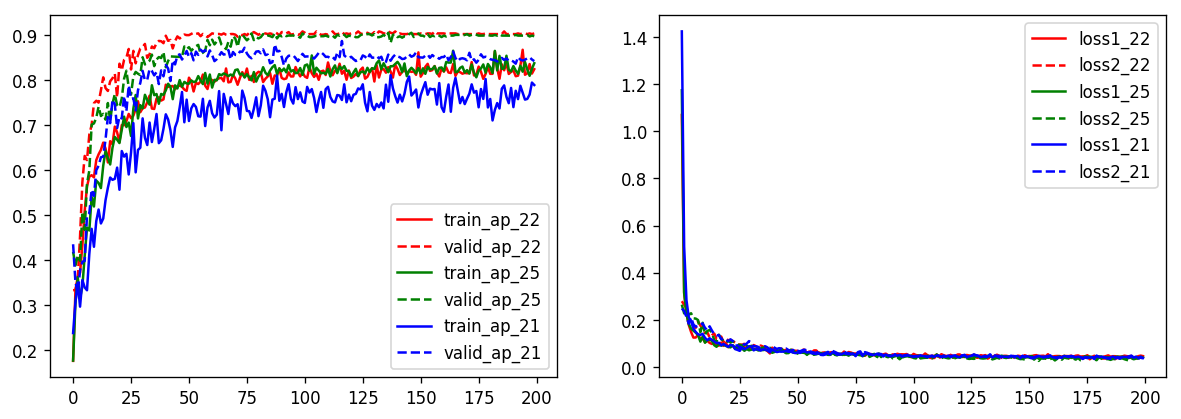

In [23]:
plot_multi_acc(info, tags=["22", "25", "21"], color='rgb', x_range=(0, -1))

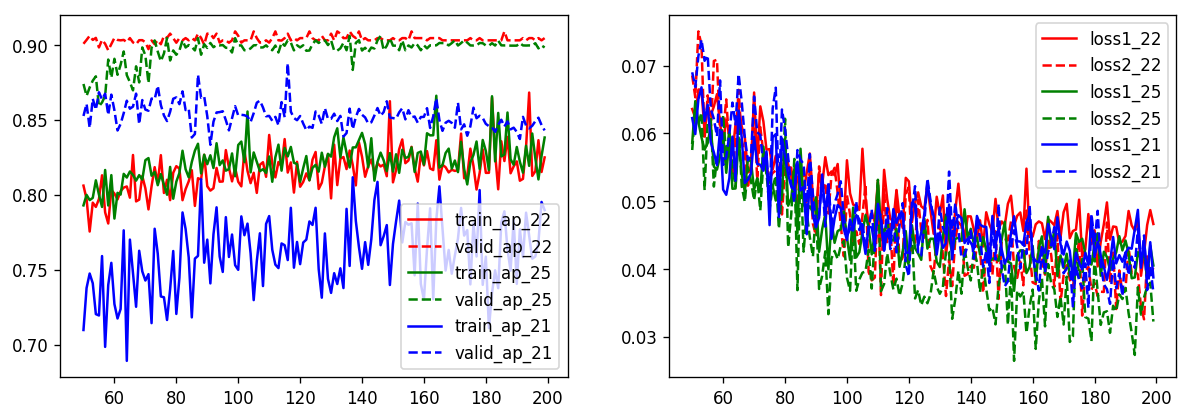

In [10]:
plot_multi_acc(info, tags=["22", "25", "21"], color='rgb', x_range=(50, -1))

(92L, 1364L, 6L)
(92L, 14L, 5L)
0.825212291741
(92L, 1364L, 6L)
(92L, 14L, 5L)
0.81414812078
(92L, 5444L, 6L)
(92L, 14L, 5L)
0.762717558431


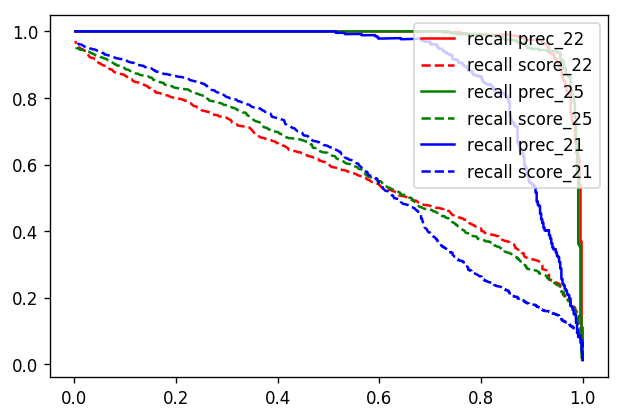

In [12]:
net = SSD(2, sizes_list, ratios_list, ctx, 
          verbose=False, body_net_args=[vgg11_bn, [22], True], prefix="ssd_")
net.load_params("../models/train11_vgg11bn_22.params", ctx=ctx)
plot_ROC(train_data, net, False, 'r', label_suffix="_22")
net = SSD(2, sizes_list, ratios_list, ctx, 
          verbose=False, body_net_args=[vgg11_bn, [25], True], prefix="ssd_")
net.load_params("../models/train11_vgg11bn_25.params", ctx=ctx)
plot_ROC(train_data, net, False, 'g', label_suffix="_25")
net = SSD(2, sizes_list, ratios_list, ctx, 
          verbose=False, body_net_args=[vgg11_bn, [21], True], prefix="ssd_")
net.load_params("../models/train11_vgg11bn_21.params", ctx=ctx)
plot_ROC(train_data, net, False, 'b', label_suffix="_21")

In [9]:
def plot_Score_Recall_Prec(train_data, net, show=True, color='r', label_suffix=""):
    train_data.reset()
    outs = None
    labels = None
    for i, batch in enumerate(train_data):
        data = batch.data[0].as_in_context(ctx)
        label = batch.label[0].as_in_context(ctx)
        anchors, box_preds, cls_preds = net(data)
        cls_probs = nd.SoftmaxActivation(cls_preds.transpose((0, 2, 1)), mode="channel")
        out = MultiBoxDetection(cls_probs, box_preds, anchors, force_suppress=True, clip=False, nms_threshold=0.45)
        if outs is None:
            outs = out
            labels = label
        else:
            outs = nd.concat(*[outs, out], dim=0)
            labels = nd.concat(*[labels, label], dim=0)
    scores, recall, prec = cal_scores_recall_prec(outs.asnumpy(), labels.asnumpy(), overlap_threshold=0.01, verbose=False)
    plt.plot(scores, recall, color, label="score_recall" + label_suffix)
    plt.plot(scores, prec, color+"--", label="score_prec" + label_suffix)
    plt.legend(loc="upper right")

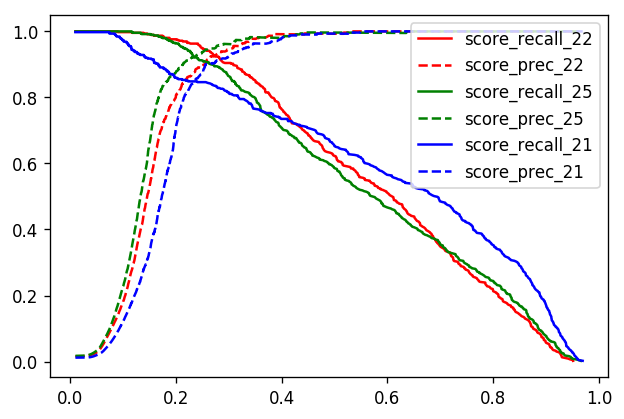

In [10]:
net = SSD(2, sizes_list, ratios_list, ctx, 
          verbose=False, body_net_args=[vgg11_bn, [22], True], prefix="ssd_")
net.load_params("../models/train11_vgg11bn_22.params", ctx=ctx)
plot_Score_Recall_Prec(train_data, net, False, 'r', label_suffix="_22")
del net
net = SSD(2, sizes_list, ratios_list, ctx, 
          verbose=False, body_net_args=[vgg11_bn, [25], True], prefix="ssd_")
net.load_params("../models/train11_vgg11bn_25.params", ctx=ctx)
plot_Score_Recall_Prec(train_data, net, False, 'g', label_suffix="_25")
del net
net = SSD(2, sizes_list, ratios_list, ctx, 
          verbose=False, body_net_args=[vgg11_bn, [21], True], prefix="ssd_")
net.load_params("../models/train11_vgg11bn_21.params", ctx=ctx)
plot_Score_Recall_Prec(train_data, net, False, 'b', label_suffix="_21")

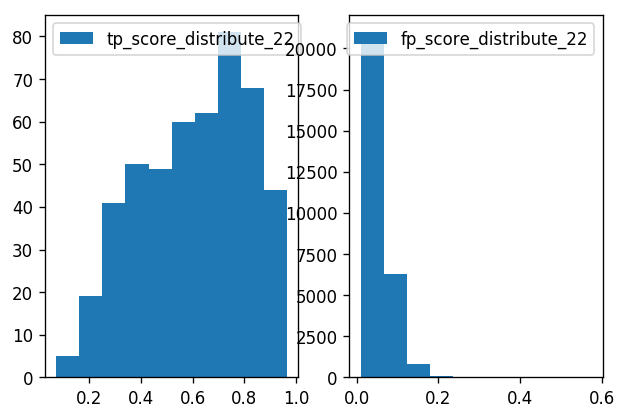

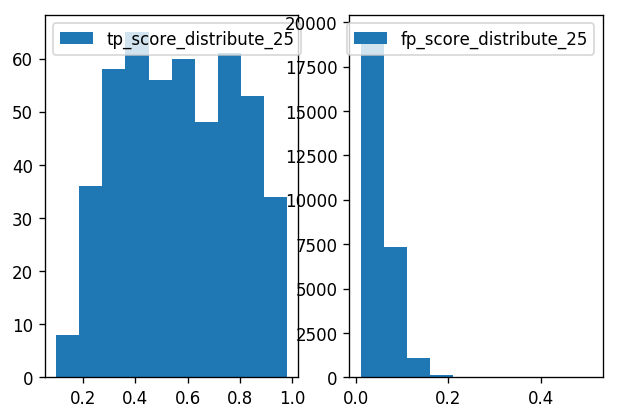

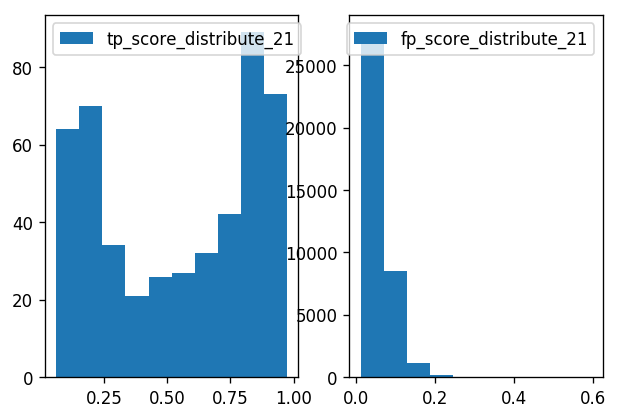

In [14]:
net = SSD(2, sizes_list, ratios_list, ctx, 
          verbose=False, body_net_args=[vgg11_bn, [22], True], prefix="ssd_")
net.load_params("../models/train11_vgg11bn_22.params", ctx=ctx)
plot_Score_hist(train_data, net, False, 'r', label_suffix="_22")
plt.show()
del net
net = SSD(2, sizes_list, ratios_list, ctx, 
          verbose=False, body_net_args=[vgg11_bn, [25], True], prefix="ssd_")
net.load_params("../models/train11_vgg11bn_25.params", ctx=ctx)
plot_Score_hist(train_data, net, False, 'r', label_suffix="_25")
plt.show()
del net
net = SSD(2, sizes_list, ratios_list, ctx, 
          verbose=False, body_net_args=[vgg11_bn, [21], True], prefix="ssd_")
net.load_params("../models/train11_vgg11bn_21.params", ctx=ctx)
plot_Score_hist(train_data, net, False, 'r', label_suffix="_21")
plt.show()
del net

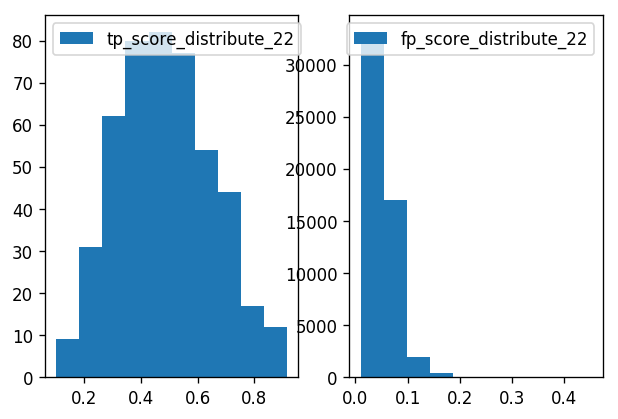

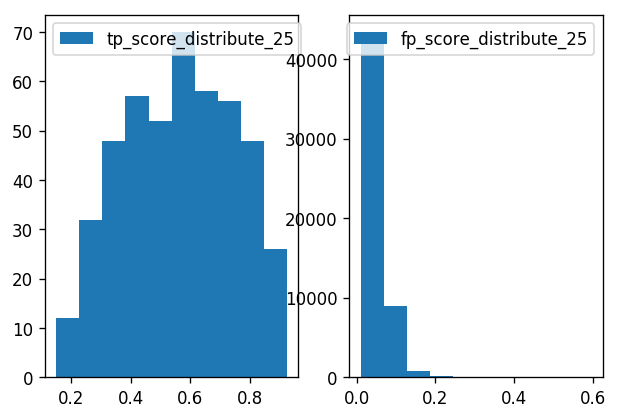

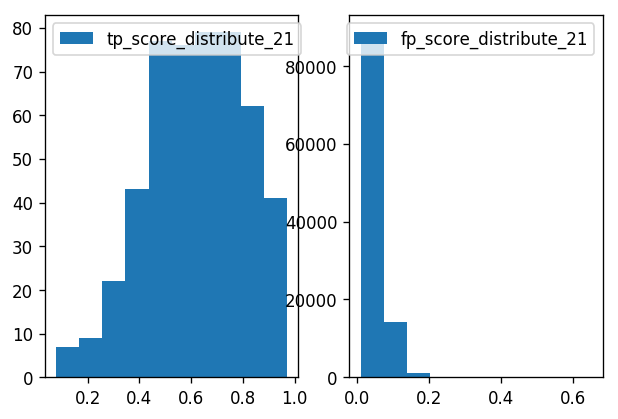

In [11]:
net = SSD(2, sizes_list, ratios_list, ctx, 
          verbose=False, body_net_args=[vgg11_bn, [22], True], prefix="ssd_")
net.load_params("../models/train11_vgg11bn_22_5.2.params", ctx=ctx)
plot_Score_hist(train_data, net, False, 'r', label_suffix="_22")
plt.show()
del net
net = SSD(2, sizes_list, ratios_list, ctx, 
          verbose=False, body_net_args=[vgg11_bn, [25], True], prefix="ssd_")
net.load_params("../models/train11_vgg11bn_25_5.2.params", ctx=ctx)
plot_Score_hist(train_data, net, False, 'r', label_suffix="_25")
plt.show()
del net
net = SSD(2, sizes_list, ratios_list, ctx, 
          verbose=False, body_net_args=[vgg11_bn, [21], True], prefix="ssd_")
net.load_params("../models/train11_vgg11bn_21_5.2.params", ctx=ctx)
plot_Score_hist(train_data, net, False, 'r', label_suffix="_21")
plt.show()
del net

# 6. 结果可视化

In [11]:
sizes_list = [[.2,.272], [.37,.447], [.54,.619],
                      [.71,.79], [.88,.961]]
# sizes_list = [[ 0.10416667 ,0.17361111], [0.18624024, 0.34354575], [.37,.619],
#                       [.71,.79], [.88,.961]]
ratios_list = [[1, 2, .5]]*len(sizes_list)
net21 = SSD(2, sizes_list, ratios_list, ctx, 
          verbose=False, body_net_args=[vgg11_bn, [21], True], prefix="ssd_")
net21.load_params("../models/train11_vgg11bn_21.params", ctx=ctx)

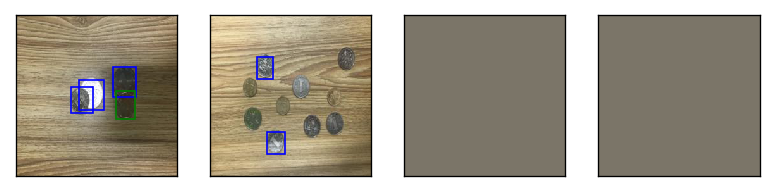

In [21]:
from utils.utils import show_det_results
from mxnet.contrib.ndarray import MultiBoxDetection

net = net21
mpl.rcParams['figure.figsize'] = (6, 6)
try:
    batch = valid_data.next()
except Exception:
    valid_data.reset()
data = batch.data[0].as_in_context(ctx)
label = batch.label[0].as_in_context(ctx)
anchors, box_preds, cls_preds = net(data)
cls_probs = nd.SoftmaxActivation(cls_preds.transpose((0, 2, 1)), mode='channel')
out = MultiBoxDetection(cls_probs, box_preds, anchors, force_suppress=True, clip=False, nms_threshold=0.45)
box_offset, box_mask, cls_labels = MultiBoxTarget(anchors, label, 
                                                  cls_preds.transpose(axes=(0, 2, 1)), negative_mining_ratio=3)

imgs = (data.transpose((0, 2, 3, 1)).asnumpy() * std)+ rgb_mean
#plt.imshow(imgs[0] / 255)
show_det_results(imgs, out, threshold=0.33, show_text=False, MN=(2, 4))

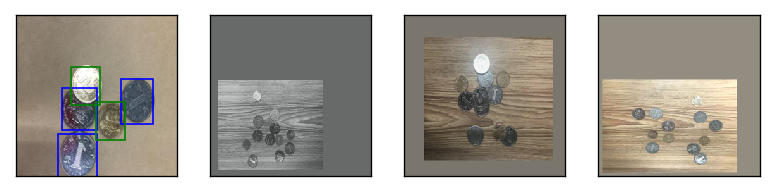

In [13]:
from utils.utils import show_det_results
from mxnet.contrib.ndarray import MultiBoxDetection

mpl.rcParams['figure.figsize'] = (6, 6)
try:
    batch = train_data.next()
except Exception:
    train_data.reset()
data = batch.data[0].as_in_context(ctx)
label = batch.label[0].as_in_context(ctx)
anchors, box_preds, cls_preds = net(data)
cls_probs = nd.SoftmaxActivation(cls_preds.transpose((0, 2, 1)), mode='channel')
out = MultiBoxDetection(cls_probs, box_preds, anchors, force_suppress=True, clip=False, nms_threshold=0.45)
box_offset, box_mask, cls_labels = MultiBoxTarget(anchors, label, 
                                                  cls_preds.transpose(axes=(0, 2, 1)), negative_mining_ratio=3)

imgs = (data.transpose((0, 2, 3, 1)).asnumpy() * std)+ rgb_mean
#plt.imshow(imgs[0] / 255)
show_det_results(imgs, out, threshold=0.4, show_text=False, MN=(2, 4))

In [14]:
sizes_list = [[.2,.272], [.37,.447], [.54,.619],
                      [.71,.79], [.88,.961]]
# sizes_list = [[ 0.10416667 ,0.17361111], [0.18624024, 0.34354575], [.37,.619],
#                       [.71,.79], [.88,.961]]
ratios_list = [[1, 2, .5]]*len(sizes_list)
net22 = SSD(2, sizes_list, ratios_list, ctx, 
          verbose=False, body_net_args=[vgg11_bn, [22], True], prefix="ssd_")
net22.load_params("../models/train11_vgg11bn_22.params", ctx=ctx)

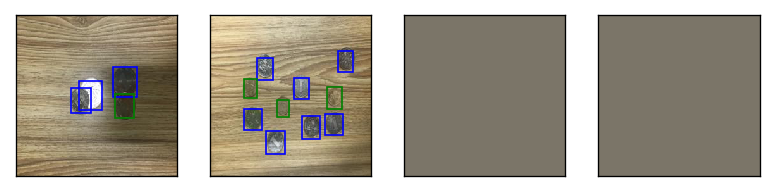

In [15]:
from utils.utils import show_det_results
from mxnet.contrib.ndarray import MultiBoxDetection

net = net22

mpl.rcParams['figure.figsize'] = (6, 6)
try:
    batch = valid_data.next()
except Exception:
    valid_data.reset()
data = batch.data[0].as_in_context(ctx)
label = batch.label[0].as_in_context(ctx)
anchors, box_preds, cls_preds = net(data)
cls_probs = nd.SoftmaxActivation(cls_preds.transpose((0, 2, 1)), mode='channel')
out = MultiBoxDetection(cls_probs, box_preds, anchors, force_suppress=True, clip=False, nms_threshold=0.45)
box_offset, box_mask, cls_labels = MultiBoxTarget(anchors, label, 
                                                  cls_preds.transpose(axes=(0, 2, 1)), negative_mining_ratio=3)

imgs = (data.transpose((0, 2, 3, 1)).asnumpy() * std)+ rgb_mean
#plt.imshow(imgs[0] / 255)
show_det_results(imgs, out, threshold=0.33, show_text=False, MN=(2, 4))

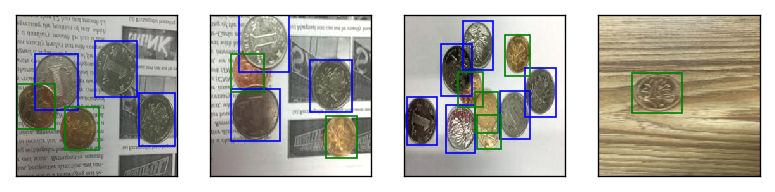

In [63]:
from utils.utils import show_det_results
from mxnet.contrib.ndarray import MultiBoxDetection

mpl.rcParams['figure.figsize'] = (6, 6)
try:
    batch = train_data.next()
except Exception:
    train_data.reset()
data = batch.data[0].as_in_context(ctx)
label = batch.label[0].as_in_context(ctx)
anchors, box_preds, cls_preds = net(data)
cls_probs = nd.SoftmaxActivation(cls_preds.transpose((0, 2, 1)), mode='channel')
out = MultiBoxDetection(cls_probs, box_preds, anchors, force_suppress=True, clip=False, nms_threshold=0.45)
box_offset, box_mask, cls_labels = MultiBoxTarget(anchors, label, 
                                                  cls_preds.transpose(axes=(0, 2, 1)), negative_mining_ratio=3)

imgs = (data.transpose((0, 2, 3, 1)).asnumpy() * std)+ rgb_mean
#plt.imshow(imgs[0] / 255)
show_det_results(imgs, out, threshold=0.3, show_text=False, MN=(2, 4))

In [16]:
# sizes_list = [[.2,.272], [.37,.447], [.54,.619],
#                       [.71,.79], [.88,.961]]
sizes_list = [[ 0.10416667 ,0.17361111], [0.18624024, 0.34354575], [.37,.619],
                      [.71,.79], [.88,.961]]
ratios_list = [[1, 2, .5]]*len(sizes_list)
net21_52 = SSD(2, sizes_list, ratios_list, ctx, 
          verbose=False, body_net_args=[vgg11_bn, [21], True], prefix="ssd_")
net21_52.load_params("../models/train11_vgg11bn_21_5.2.params", ctx=ctx)

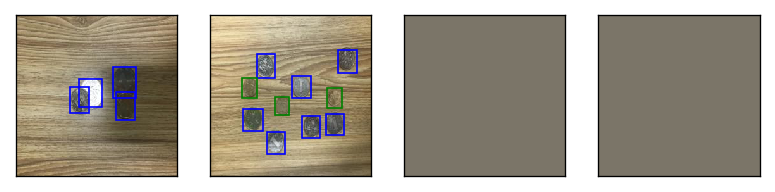

In [17]:
from utils.utils import show_det_results
from mxnet.contrib.ndarray import MultiBoxDetection

net = net21_52

mpl.rcParams['figure.figsize'] = (6, 6)
try:
    batch = valid_data.next()
except Exception:
    valid_data.reset()
data = batch.data[0].as_in_context(ctx)
label = batch.label[0].as_in_context(ctx)
anchors, box_preds, cls_preds = net(data)
cls_probs = nd.SoftmaxActivation(cls_preds.transpose((0, 2, 1)), mode='channel')
out = MultiBoxDetection(cls_probs, box_preds, anchors, force_suppress=True, clip=False, nms_threshold=0.45)
box_offset, box_mask, cls_labels = MultiBoxTarget(anchors, label, 
                                                  cls_preds.transpose(axes=(0, 2, 1)), negative_mining_ratio=3)

imgs = (data.transpose((0, 2, 3, 1)).asnumpy() * std)+ rgb_mean
#plt.imshow(imgs[0] / 255)
show_det_results(imgs, out, threshold=0.33, show_text=False, MN=(2, 4))

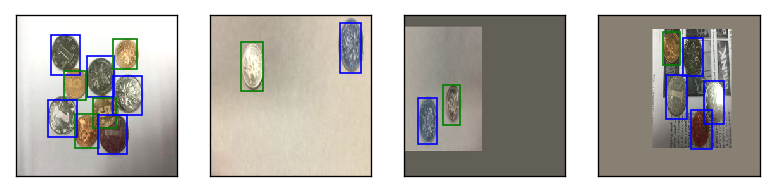

In [18]:
from utils.utils import show_det_results
from mxnet.contrib.ndarray import MultiBoxDetection

mpl.rcParams['figure.figsize'] = (6, 6)
try:
    batch = train_data.next()
except Exception:
    train_data.reset()
data = batch.data[0].as_in_context(ctx)
label = batch.label[0].as_in_context(ctx)
anchors, box_preds, cls_preds = net(data)
cls_probs = nd.SoftmaxActivation(cls_preds.transpose((0, 2, 1)), mode='channel')
out = MultiBoxDetection(cls_probs, box_preds, anchors, force_suppress=True, clip=False, nms_threshold=0.45)
box_offset, box_mask, cls_labels = MultiBoxTarget(anchors, label, 
                                                  cls_preds.transpose(axes=(0, 2, 1)), negative_mining_ratio=3)

imgs = (data.transpose((0, 2, 3, 1)).asnumpy() * std)+ rgb_mean
#plt.imshow(imgs[0] / 255)
show_det_results(imgs, out, threshold=0.3, show_text=False, MN=(2, 4))